<a href="https://colab.research.google.com/github/nazliozenn/project2gradesystem/blob/main/Proje_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [ ]:
data= pd.read_csv("NetflixOriginals.csv")
data.head()


,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


# Yeni Bölüm

In [ ]:
data["Premiere"] = pd.to_datetime(data["Premiere"])
data["Year"] = data["Premiere"].apply(lambda x: x.year)
data["Month"] = data["Premiere"].apply(lambda x: x.month)
data["Day"] = data["Premiere"].apply(lambda x: x.day)

•Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.


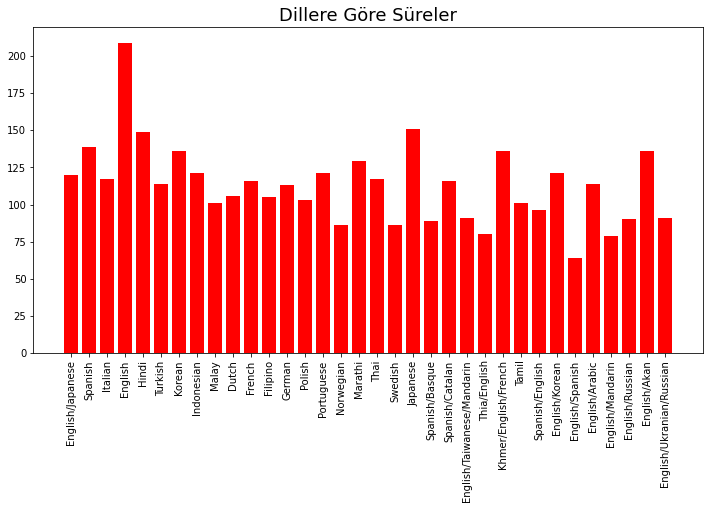

In [ ]:
longtermed_films=data[data.Runtime>50]
language=longtermed_films["Language"].values
runtimes=longtermed_films["Runtime"].values

plt.figure(figsize=(12,6))
plt.bar(language,runtimes,color="red")
plt.title("Dillere Göre Süreler",fontsize=18)

plt.xticks(rotation=90)
plt.show()

•   2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.

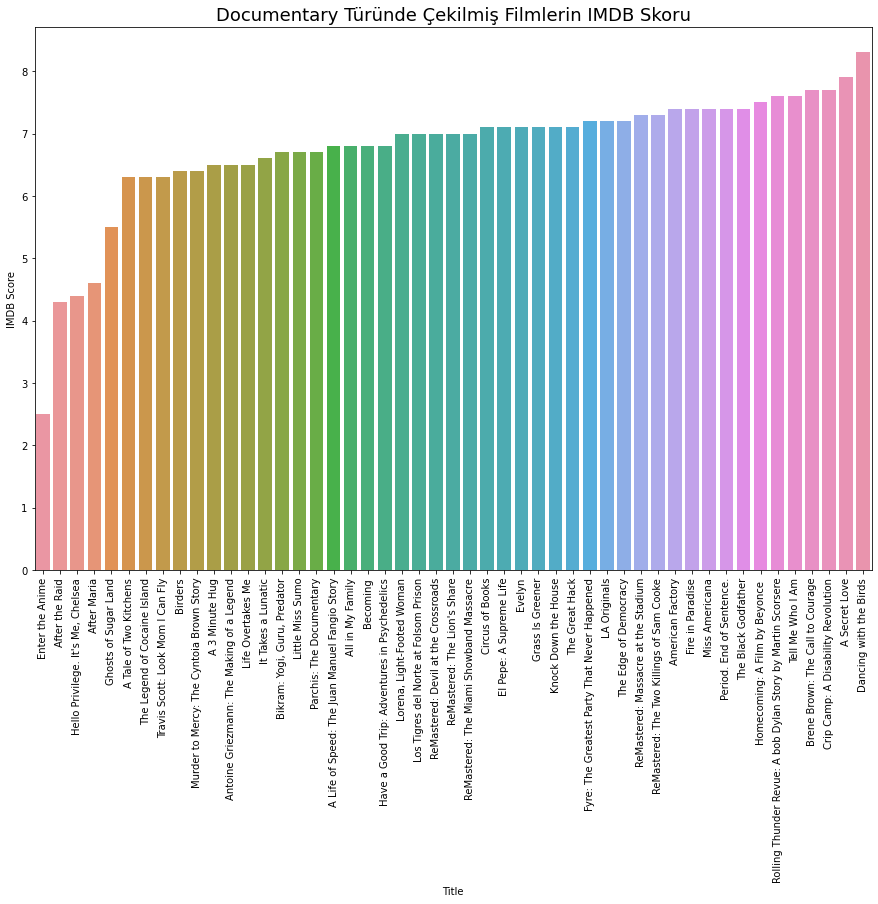

In [ ]:
data_doc = data[(data["Premiere"] >= "2019-01-01") & (data["Premiere"] <= "2020-06-01") & (data["Genre"] == "Documentary")]

plt.figure(figsize=(15,10))
sns.barplot(x = "Title", y = "IMDB Score", data = data_doc)
plt.title("Documentary Türünde Çekilmiş Filmlerin IMDB Skoru",fontsize = 18)
plt.xticks(rotation = 90)
plt.show()

•   İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir? ✓


In [ ]:
data[data["Language"]=="English"].sort_values("IMDB Score",ascending=False)["Genre"].head(1)


583    Documentary
Name: Genre, dtype: object

•   'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir? ✓


In [ ]:
hindi=data[data["Language"]=="Hindi"]
hindi["Runtime"].mean()


115.78787878787878

•'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir? Görselleştirerek ifade ediniz.

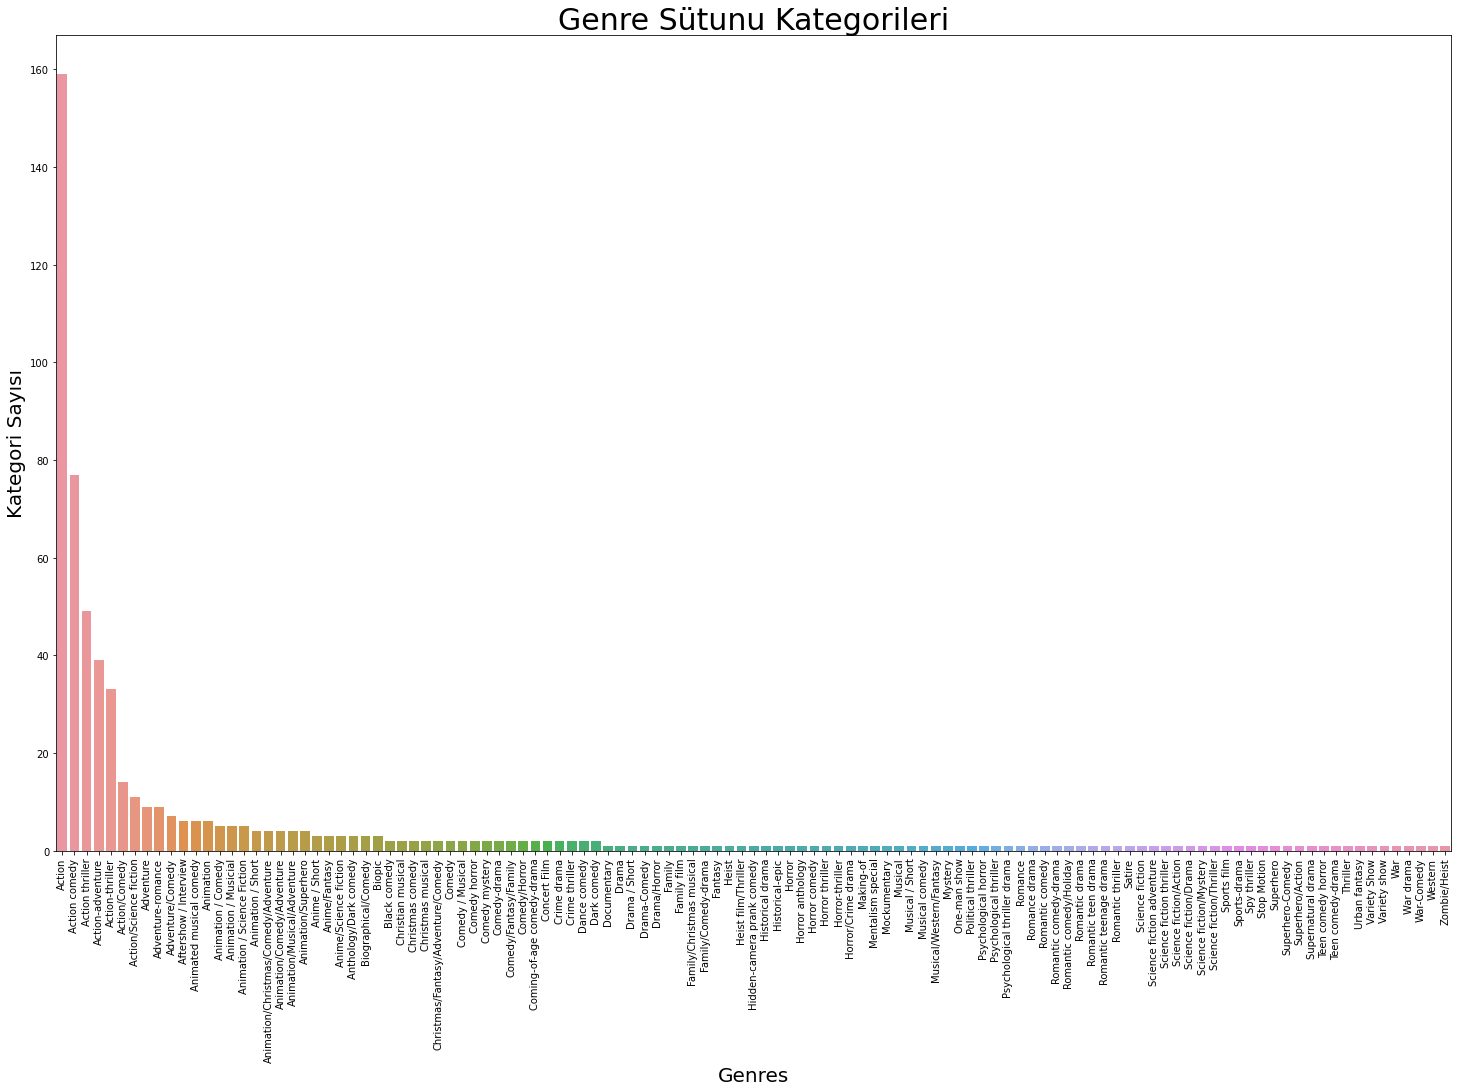

' plt.bar(genres,value_genre)\nplt.title("Genre Sütunu Kategorileri")\nplt.show() '

In [ ]:
genres=data["Genre"].sort_values().drop_duplicates().values
value_genre=data["Genre"].value_counts()

plt.figure(figsize=(25,15))
sns.barplot(x = genres,y=value_genre)
plt.title("Genre Sütunu Kategorileri",fontsize = 30)
plt.xlabel("Genres",fontsize=20)
plt.ylabel("Kategori Sayısı",fontsize=20)
plt.xticks(rotation=90)
plt.show()


•   Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.    ✓


In [ ]:
data.value_counts("Language").head(3)

Language
English    401
Hindi       33
Spanish     31
dtype: int64

•   IMDB puanı en yüksek olan ilk 10 film hangileridir? ✓


In [ ]:
data.sort_values("IMDB Score",ascending=False)["Title"].head(10)

583       David Attenborough: A Life on Our Planet
582      Emicida: AmarElo - It's All For Yesterday
581                        Springsteen on Broadway
580    Winter on Fire: Ukraine's Fight for Freedom
579          Taylor Swift: Reputation Stadium Tour
578     Ben Platt: Live from Radio City Music Hall
577                         Dancing with the Birds
576                        Cuba and the Cameraman 
573                                          Klaus
571                                           13th
Name: Title, dtype: object

• IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.

In [ ]:
data["Runtime"].corr(data["IMDB Score"])


-0.04089629142078858

In [ ]:
data[["IMDB Score", "Runtime"]].corr()


,IMDB Score,Runtime
IMDB Score,1.000000,-0.040896
Runtime,-0.040896,1.000000


In [ ]:
data[["Runtime", "IMDB Score"]].corr()


,Runtime,IMDB Score
Runtime,1.000000,-0.040896
IMDB Score,-0.040896,1.000000


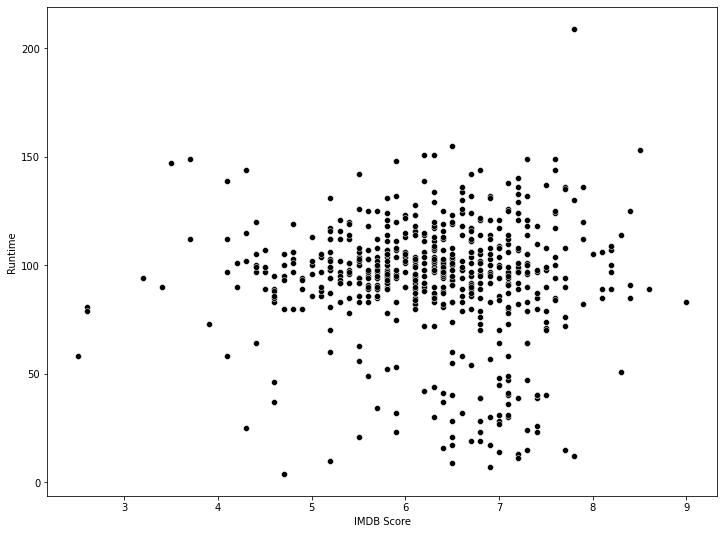

In [ ]:
plt.figure(figsize=(12,9))
sns.scatterplot(x=data['IMDB Score'],y=data['Runtime'],color='black')
plt.xlabel('IMDB Score')
plt.ylabel('Runtime')
plt.show()

•IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.


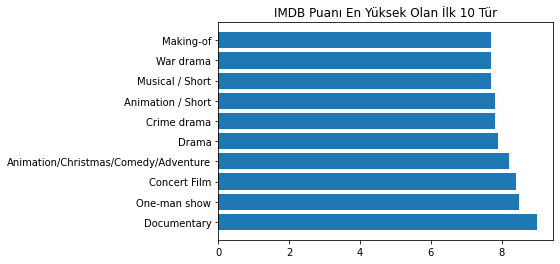

In [ ]:
value=data.sort_values("IMDB Score",ascending=False).drop_duplicates(["Genre"]).head(10)
imdb_score=value["IMDB Score"].values
genre=value["Genre"].values

plt.barh(genre,imdb_score)
plt.title("IMDB Puanı En Yüksek Olan İlk 10 Tür")
plt.show()

•'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz. ✓


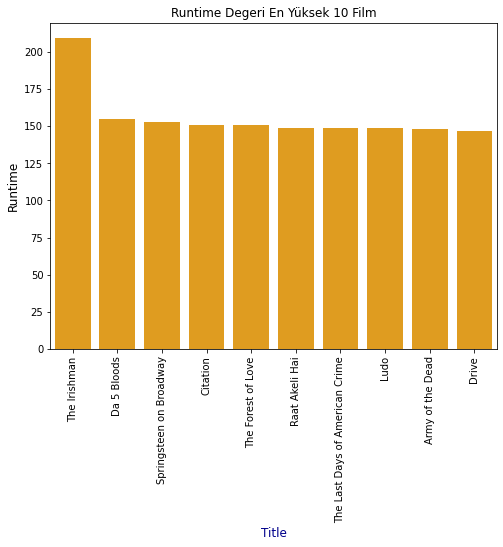

In [ ]:
values=data.sort_values("Runtime",ascending=False).head(10)
films=values["Title"].values
runtimes=values["Runtime"].values

plt.figure(figsize=(8,6))
sns.barplot(x=films,y=runtimes,color='orange')
plt.title("Runtime Degeri En Yüksek 10 Film")
plt.xlabel('Title',fontdict = { 'color':  'darkblue', 'weight': 'normal', 'size': 12})
plt.ylabel('Runtime',fontdict = {'family': 'DejaVu Sans','size':12})
plt.xticks(rotation=90)
plt.show()


•Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.

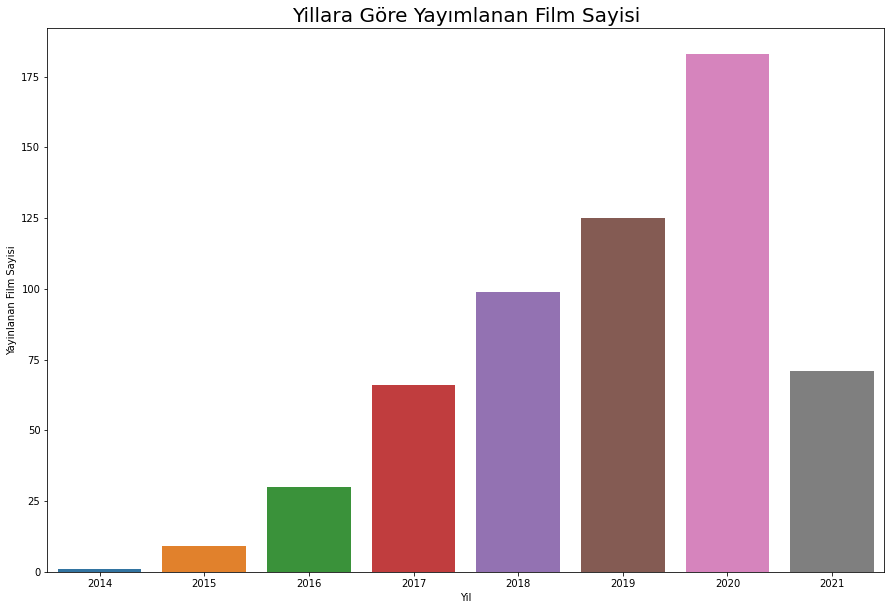

In [ ]:
best_year = data["Year"].value_counts()

plt.figure(figsize=(15,10))
sns.barplot(x = best_year.index,y=best_year.values)
plt.title("Yillara Göre Yayımlanan Film Sayisi",fontsize = 20)
plt.xlabel("Yil")
plt.ylabel("Yayinlanan Film Sayisi")
plt.show()


•Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir? Görselleştiriniz.


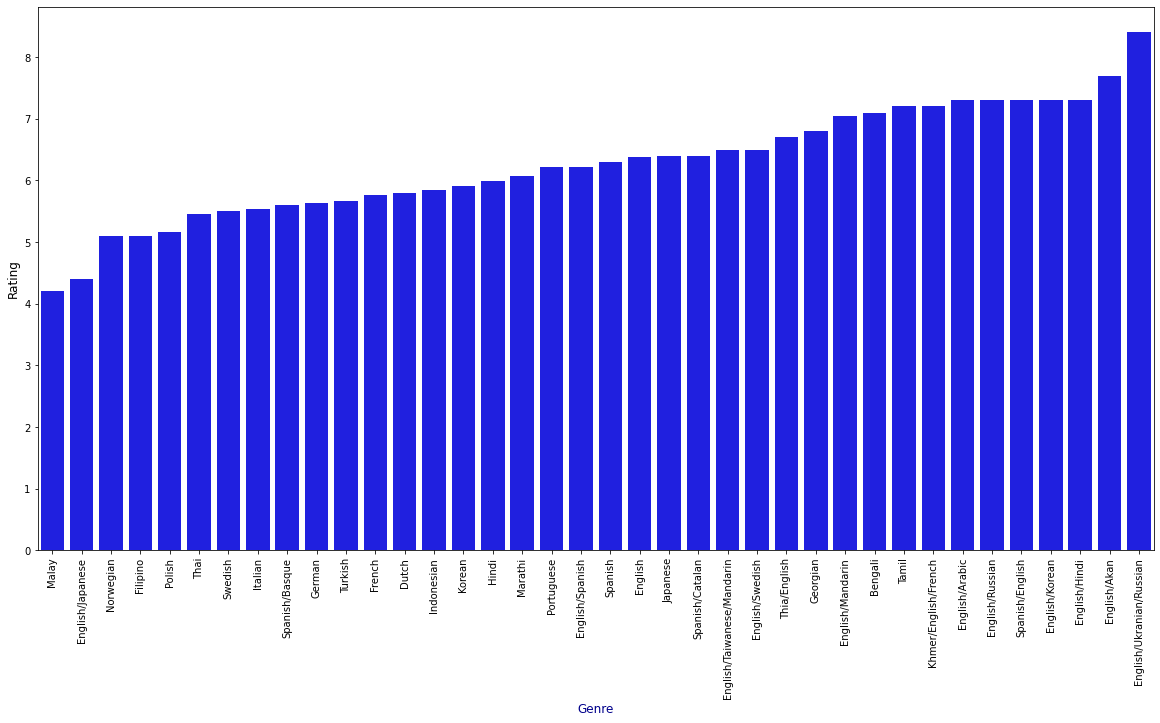

In [ ]:
lowest=data.groupby("Language")["IMDB Score"].mean().sort_values()

plt.figure(figsize=(20,10))
sns.barplot(x=lowest.index,y=lowest.values,color='blue')
plt.xlabel('Genre',fontdict = { 'color':  'darkblue', 'weight': 'normal', 'size': 12})
plt.ylabel('Rating',fontdict = {'family': 'DejaVu Sans','size':12})
plt.xticks(rotation=90)
plt.show()

•Hangi yılın toplam "runtime" süresi en fazladır? ✓


In [ ]:
data.sort_values("Runtime",ascending=False)["Premiere"].head(1)

561    November 27, 2019
Name: Premiere, dtype: object

•Her bir dilin en fazla kullanıldığı "Genre" nedir?


In [ ]:
genres=data.groupby("Genre")["Language"].size().sort_values(ascending=False)
genres

Genre
Documentary                   159
Drama                          77
Comedy                         49
Romantic comedy                39
Thriller                       33
                             ... 
Coming-of-age comedy-drama      1
Comedy/Horror                   1
Comedy/Fantasy/Family           1
Comedy mystery                  1
Zombie/Heist                    1
Name: Language, Length: 115, dtype: int64

•Veri setinde outlier veri var mıdır? Açıklayınız.


In [ ]:
def outlier_detection(dataframe):
    num_cols = dataframe.select_dtypes(include = ['float64',"int64"])
    for col in num_cols:
        sns.boxplot(y = dataframe[col])
        plt.title(f"Boxplot of {col.upper()}")
        plt.show()
    
    Q1 = dataframe.quantile(0.25)
    Q3 = dataframe.quantile(0.75)
    IQR = Q3-Q1
    
    min_bound = Q1 - 1.5*IQR
    max_bound = Q3 + 1.5*IQR
    
    
    print("Before: ",dataframe.shape)
    
    dataframe = dataframe[~((dataframe < (min_bound)) | (dataframe > (max_bound))).any(axis=1)]
    print("After: ", dataframe.shape )
    
    return dataframe

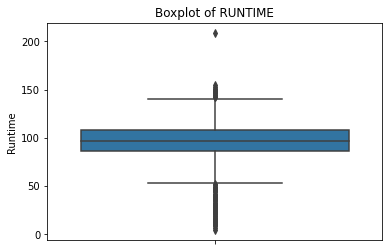

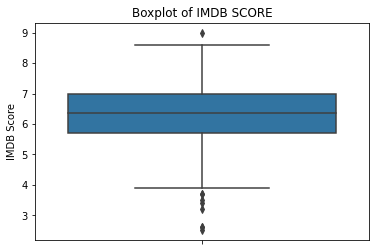

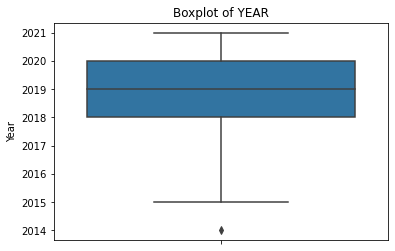

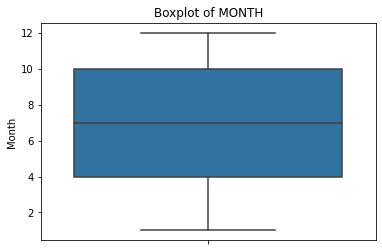

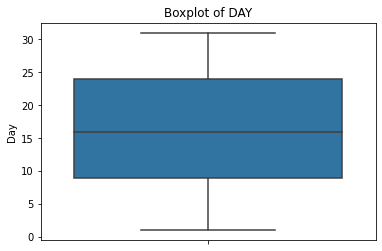

Before:  (584, 6)
After:  (501, 6)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`


,Runtime,IMDB Score,Language,Year,Month,Day
8,73,3.9,English,2018,3,23
9,139,4.1,Hindi,2021,5,18
10,58,4.1,English,2021,4,22
11,112,4.1,Korean,2020,11,27
12,97,4.1,Indonesian,2020,9,18
...,...,...,...,...,...,...
576,114,8.3,English,2017,11,24
578,85,8.4,English,2020,5,20
579,125,8.4,English,2018,12,31
580,91,8.4,English/Ukranian/Russian,2015,10,9


In [ ]:
outlier_detection(data.loc[:,"Runtime":])

Runtime,IMDB Score ve Year sütunlarında aykırı değerler görülmektedir.
